# k-nearest neighbors

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
# -----------------------------

COLORS = ['#F00D2C', '#553C67']

# load data from text
data = np.loadtxt('lec15.txt')
num_points = data.shape[0]

x = data[:, 0:2]
c = data[:, 2]

# Split into training, validation and testing sets
num_train = int(num_points*0.8*0.8)
num_valid = int(num_points*0.8*0.2)
num_test = num_points - num_train - num_valid

x_train = x[0:num_train]
c_train = c[0:num_train]
    
x_valid = x[num_train:num_train+num_valid]
c_valid = c[num_train:num_train+num_valid]
    
x_test = x[num_train+num_valid:]
c_test = c[num_train+num_valid:]

# Print out how big each set is
print("  Number training points = " + str(num_train))
print("Number validation points = " + str(num_valid))
print("   Number testing points = " + str(num_test))
print("            Total points = " + str(num_points))

  Number training points = 119
Number validation points = 29
   Number testing points = 39
            Total points = 187


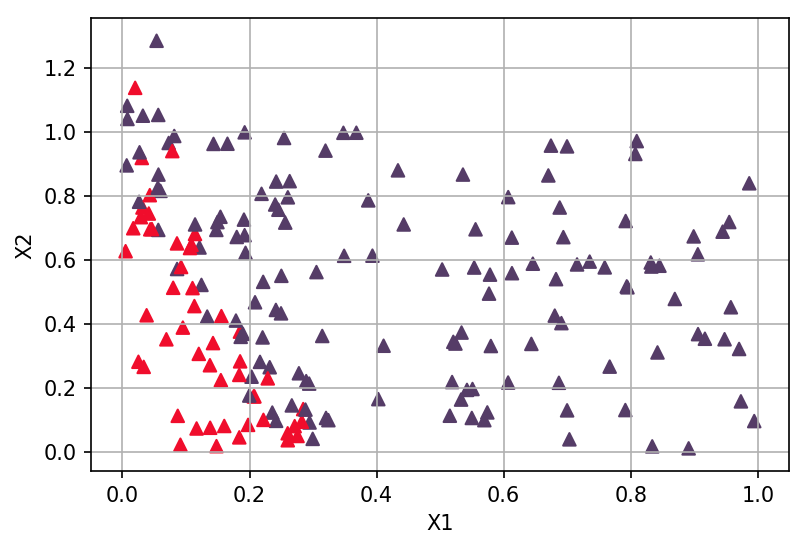

In [4]:
# turn 0,1,2 to color strings just for plotting
c_color = []
for i in range(num_points):
    c_color.append(COLORS[int(c[i])])
    
plt.scatter(x[:,0], x[:,1], marker='^', c=c_color)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

Let's try to use k-nn to predict the validation set, trying k = 3.

In [5]:
# We'll use the mode statistic to do majority vote
from scipy.stats import mode

k = 3

def nearest_neighbors(x, x_train, k):
    # compute the distances from x to each point in x_train
    distances = np.zeros(len(x_train))
    for i, xt in enumerate(x_train):
        distances[i] = np.linalg.norm(x-xt)
        
    # find the k nearest points by sorting distances
    sorted_indices = np.argsort(distances)
    top_k = sorted_indices[0:k]
    
    return top_k

c_valid_predicted = np.zeros(len(c_valid))
for i, xv in enumerate(x_valid):
    # find the k nearest neighbors for validation point xv
    nn = nearest_neighbors(xv, x_train, k)
    
    # majority vote
    c_valid_predicted[i] = mode(c_train[nn])[0]

print(c_valid)
print(c_valid_predicted)

[1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0.]
[0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0.]


Text(0,0.5,'X2')

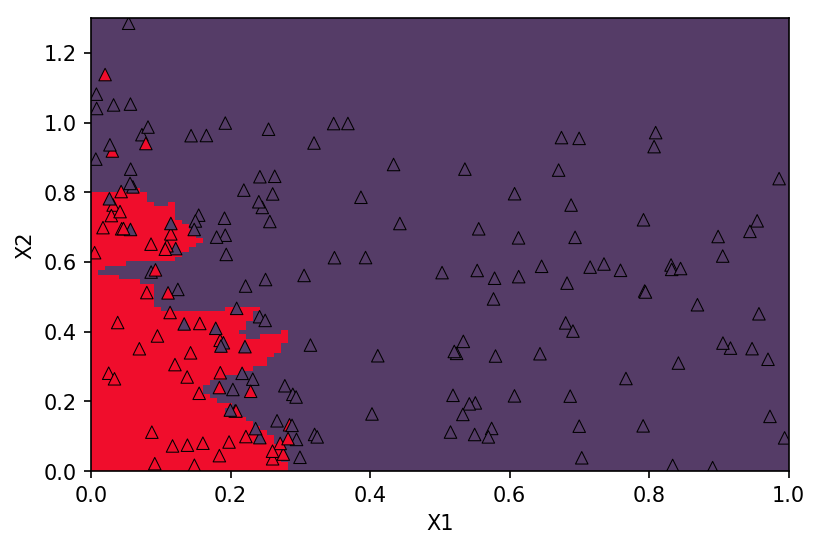

In [14]:
# Classify all the points in the plane
# You could ignore this if you wanted
x1_plot = np.linspace(0, 1, 100)
x2_plot = np.linspace(0, 1.3, 100)
# Form all combinations from x1_plot and x2_plot
xx1, xx2 = np.meshgrid(x1_plot, x2_plot)
# Flatten xx1 and xx2 to a list of points
x_plot = np.array([xx1.ravel(), xx2.ravel()]).transpose()
# classify each point
c_plot = np.zeros(len(xx1.ravel()))
for i, xv in enumerate(x_plot):
    nn = nearest_neighbors(xv, x_train, k)
    c_plot[i] = mode(c_train[nn])[0]
# put back into matrix
c_plot = c_plot.reshape(xx1.shape)
# plot classification at each point as a colored region
from matplotlib.colors import ListedColormap
plt.pcolormesh(xx1, xx2, c_plot, cmap=ListedColormap(COLORS))
plt.scatter(x[:,0], x[:,1], marker='^', edgecolors='k', linewidth=0.5, c=c_color)
plt.xlabel('X1')
plt.ylabel('X2')

In [8]:
# Accuracy
num_correct = np.sum(c_valid == c_valid_predicted)
accuracy = num_correct / num_valid
print("Classification Accuracy (Validation) = " + str(accuracy))

Classification Accuracy (Validation) = 0.6206896551724138


In [9]:
# Accuracy
c_valid_dummy = np.ones(len(c_valid))
num_correct = np.sum(c_valid == c_valid_dummy)
accuracy = num_correct / num_valid
print("Classification Accuracy (Validation) = " + str(accuracy))

Classification Accuracy (Validation) = 0.6896551724137931


## Precision and Recall

In [6]:
# Calculate True positive, False positives and False negatives
TP = np.sum(np.logical_and(c_valid_predicted == 1, c_valid == 1))
FP = np.sum(np.logical_and(c_valid_predicted == 1, c_valid == 0))
FN = np.sum(np.logical_and(c_valid_predicted == 0, c_valid == 1))

# Precision and recall
precision_valid = TP/(TP + FP)
recall_valid = TP / (TP + FN)

print("Precision (Validation) = " + str(precision_valid))
print("Recall (Validation) = " + str(recall_valid))

F1 = 2/(1/precision_valid + 1/recall_valid)
print("F1 (Validation) = " + str(F1))

Precision (Validation) = 0.7368421052631579
Recall (Validation) = 0.7
F1 (Validation) = 0.717948717948718


In [10]:
# Calculate True positive, False positives and False negatives
TP = np.sum(np.logical_and(c_valid_dummy == 1, c_valid == 1))
FP = np.sum(np.logical_and(c_valid_dummy == 1, c_valid == 0))
FN = np.sum(np.logical_and(c_valid_dummy == 0, c_valid == 1))

# Precision and recall
precision_dummy = TP / (TP + FP)
recall_dummy = TP / (TP + FN)

print("Precision (Validation) = " + str(precision_dummy))
print("Recall (Validation) = " + str(recall_dummy))

F1 = 2/(1/precision_dummy + 1/recall_dummy)
print("F1 (Validation) = " + str(F1))

Precision (Validation) = 0.6896551724137931
Recall (Validation) = 1.0
F1 (Validation) = 0.8163265306122448


In [ ]:
# F-beta where beta = 2
beta = 2
F2_valid = (1+beta**2) *(precision_valid*recall_valid)/ (beta**2 * precision_valid + recall_dummy)
F2_dummy = (1+beta**2) *(precision_dummy*recall_dummy)/ (beta**2 * precision_dummy + recall_dummy)

print("        F2 = " + str(F2_valid))
print("F2 (Dummy) = " + str(F2_dummy))

# Logistic Regression


In [16]:
import itertools
import scipy

# multivariate analog of np.vander
def form_design_matrix(X, k = 1):
    num_rows = X.shape[0]
    num_cols = X.shape[1]
    
    # Add a column of 1's to the set of variables
    XX = np.concatenate((np.ones([num_rows, 1]), X), axis=1)
    
    # form the list of all multivariable monomials with total degree = 1
    combinations = itertools.combinations_with_replacement(range(num_cols+1), k)
    # the number of such monomials
    num_combinations = int(scipy.special.binom(num_cols+1 + k - 1, k))
    Phi_T = np.zeros([num_combinations, num_rows])
    
    # iterate over all monomials
    for j, exp in enumerate(combinations):
        # iterate over all data points
        for i in range(num_rows):
            # apply the j-th monomial
            Phi_T[j, i] = 1
            for l in range(k):
                Phi_T[j, i] = Phi_T[j, i]*XX[i, exp[l]]
            Phi_T[j,i] = Phi_T[j,i]

    Phi = np.transpose(Phi_T)
    
    return Phi


In [17]:
# we'll use just linear terms
n = 1
Phi_train = form_design_matrix(x_train, n)
Phi_valid = form_design_matrix(x_valid, n)

# z-normalize columns of Phi
mu_Phi = np.mean(Phi_train)
sig_Phi = np.std(Phi_train)

Phi_train = (Phi_train - mu_Phi)/sig_Phi
Phi_valid = (Phi_valid - mu_Phi)/sig_Phi

# train logistic regression model.
# We'll use sklearn.linear_model.LogisticRegression 
# to avoid having to write our own MLE optimization
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False)
model.fit(Phi_train, c_train)

# predict validation data
c_valid_predicted = model.predict(Phi_valid)
print(c_valid_predicted)

print(c_valid)

# Calculate True positive, False positives and False negatives
TP = np.sum(np.logical_and(c_valid_predicted == 1, c_valid == 1))
FP = np.sum(np.logical_and(c_valid_predicted == 1, c_valid == 0))
FN = np.sum(np.logical_and(c_valid_predicted == 0, c_valid == 1))

# Precision and recall
precision = TP/(TP + FP)
recall = TP / (TP + FN)

print("Precision (Validation) = " + str(precision))
print("Recall (Validation) = " + str(recall))

F1 = 2/(1/precision + 1/recall)
print("F1 (Validation) = " + str(F1))

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0.]
Precision (Validation) = 0.8260869565217391
Recall (Validation) = 0.95
F1 (Validation) = 0.8837209302325582


Text(0,0.5,'X2')

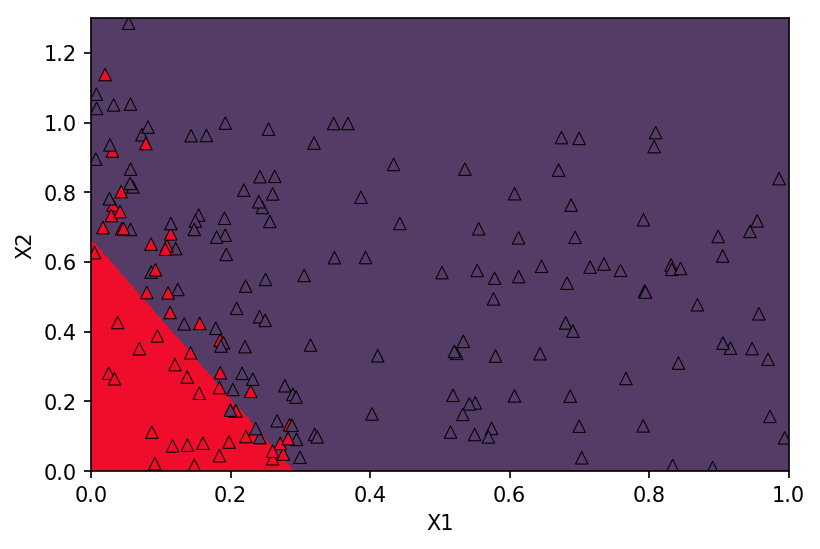

In [19]:
# Color plot
x1_plot = np.linspace(0, 1, 500)
x2_plot = np.linspace(0, 1.3, 500)
xx1, xx2 = np.meshgrid(x1_plot, x2_plot)

x_plot = np.array([xx1.ravel(), xx2.ravel()]).transpose()
Phi_plot = form_design_matrix(x_plot, n)
Phi_plot = (Phi_plot-mu_Phi)/sig_Phi
c_plot = model.predict(Phi_plot)
c_plot = c_plot.reshape(xx1.shape)

from matplotlib.colors import ListedColormap
plt.pcolormesh(xx1, xx2, c_plot, cmap=ListedColormap(COLORS))
plt.scatter(x[:,0], x[:,1], marker='^', edgecolors='k', linewidth=0.5, c=c_color)
plt.xlabel('X1')
plt.ylabel('X2')